In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

## Questão 1.

Média =  3.0
Devio Padrão =  2.30940107676


(array([ 1.,  0.,  2.,  0.,  0.,  3.,  0.,  2.,  0.,  1.]),
 array([-1. , -0.2,  0.6,  1.4,  2.2,  3. ,  3.8,  4.6,  5.4,  6.2,  7. ]),
 <a list of 10 Patch objects>)

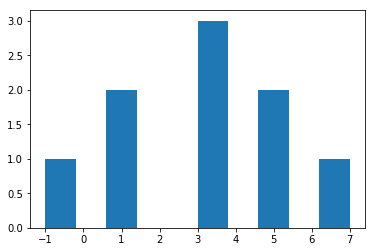

In [2]:
X = np.array([3,3,3,1,1,-1,5,5,7])
print("Média = ",np.mean(X))
print("Devio Padrão = ",np.std(X))
plt.hist(X)

## Questão 2.

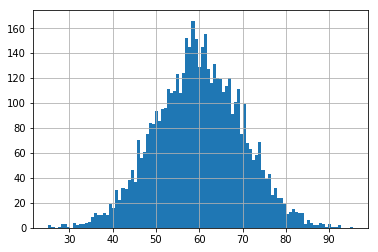

In [3]:
normal = np.random.normal(loc= 60, scale= 10, size = 5000)
plt.hist(normal, bins = 100)
plt.grid()
%clear

## Questão 3.

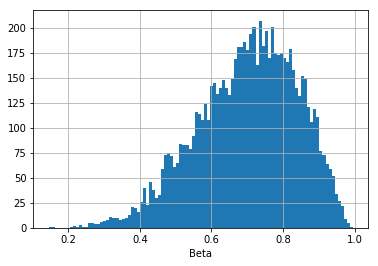

In [4]:
beta = np.random.beta(7,3,size=8000)
plt.hist(beta, bins = 100)
plt.grid()
plt.xlabel("Beta")
%clear

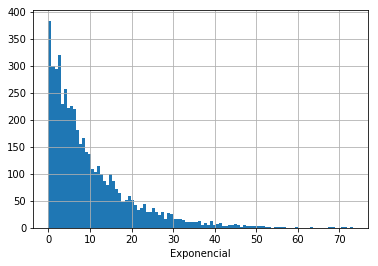

In [5]:
expo = np.random.exponential(scale = 10,size = 5000)
plt.hist(expo,bins=100)
plt.grid()
plt.xlabel("Exponencial")
%clear

## Questão 4. 

### Implementação

In [6]:
# y = b0 + b1 * x
# b1 é a inclinação, b0 é y-intercept
def compute_error_for_line_given_points(b0, b1, x, y):
    totalError = np.sum((y - (b1 * x + b0)) ** 2)
    return totalError / float(len(y))

def step_gradient(b0_current, b1_current, x, y, learning_rate):
    N = float(len(y))
    b0_gradient = 2/N * np.sum(-(y - ((b1_current * x) + b0_current)))
    b1_gradient = 2/N * np.sum(-x * (y - ((b1_current * x) + b0_current)))
    new_b0 = b0_current - (learning_rate * b0_gradient)
    new_b1 = b1_current - (learning_rate * b1_gradient)
    return new_b0, new_b1

def gradient_descent_runner(x, y, b0, b1, learning_rate, num_iterations):
    for _ in range(num_iterations):
        b0, b1 = step_gradient(b0, b1, x, y, learning_rate)
    return b0, b1

def run(x, y, initial_b0, initial_b1, learning_rate, num_iterations):
    print("Inicia com b0 = {}, b1 = {}, error = {}".format(initial_b0, initial_b1, compute_error_for_line_given_points(initial_b0, initial_b1, x, y)))  
    print("Executando...")
    b0, b1 = gradient_descent_runner(x, y, initial_b0, initial_b1, learning_rate, num_iterations)
    print("Após {} iterações, obtemos b0 = {}, b1 = {}, error = {}".format(num_iterations, b0, b1, compute_error_for_line_given_points(b0, b1, x, y)))

### Carregando dados

In [7]:
points = np.genfromtxt("data.csv", delimiter=",")

In [8]:

%%time
x = points[:, 0]
y = points[:, 1]
learning_rate = 0.0001
initial_b0 = 0 # y-intercept inicial
initial_b1 = 0 # inclinação inicial
num_iterations = 1000000
run(x, y, initial_b0, initial_b1, learning_rate, num_iterations)

Inicia com b0 = 0, b1 = 0, error = 5565.107834483214
Executando...
Após 1000000 iterações, obtemos b0 = 7.986822773189424, b1 = 1.3225135372757006, error = 110.25738413161345
CPU times: user 25.6 s, sys: 4 ms, total: 25.7 s
Wall time: 25.6 s


In [9]:
%%time
model = linear_model.LinearRegression()
X = [ [i] for i in x ] 
model.fit(X, y)
b0, b1 = model.intercept_, model.coef_
y_pred = model.predict(X)
print("b0 = {}, b1 = {}, error = {}".format(b0, b1, compute_error_for_line_given_points(b0, b1, x, y)))

b0 = 7.991020982270399, b1 = [ 1.32243102], error = 110.25738346621316
CPU times: user 0 ns, sys: 4 ms, total: 4 ms
Wall time: 5.06 ms


### Item A

In [10]:
%%time
x = points[:, 0]
y = points[:, 1]
learning_rate = 0.01
initial_b0 = 0 # y-intercept inicial
initial_b1 = 0 # inclinação inicial
num_iterations = 100
run(x, y, initial_b0, initial_b1, learning_rate, num_iterations)

Inicia com b0 = 0, b1 = 0, error = 5565.107834483214
Executando...
Após 100 iterações, obtemos b0 = -2.185824792541556e+167, b1 = -1.1121132929727213e+169, error = inf
CPU times: user 8 ms, sys: 0 ns, total: 8 ms
Wall time: 5.47 ms


/home/johnny/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in square
  after removing the cwd from sys.path.


Com o grande número de iteração alta e a taxa de aprendizagem alta. O ângulo de inclinação cresce muito rápido, com isso é dificil achar uma inclinação correta, e com o aumento rápido o valor tende a infinito.

### Item B

In [11]:
%%time
x = points[:, 0]
y = points[:, 1]
learning_rate = 0.01
initial_b0 = 0 # y-intercept inicial
initial_b1 = 0 # inclinação inicial
num_iterations = 80
run(x, y, initial_b0, initial_b1, learning_rate, num_iterations)

Inicia com b0 = 0, b1 = 0, error = 5565.107834483214
Executando...
Após 80 iterações, obtemos b0 = -3.6675371689268946e+133, b1 = -1.865985257351132e+135, error = 8.67998254912577e+273
CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 2.52 ms


Com a diminuição do número de iteração é possível executar, entretanto, a taxa de erro continua alta

## Questão 5.

Inicia com b0 = 0, b1 = 0, error = 853423.0
Executando...
Após 10000000 iterações, obtemos b0 = 27.637252389588607, b1 = 0.14328466354759217, error = 66588.02332458054
_____________SKLEARN_________
b0 = 98.24832962138083, b1 = [ 0.10976774], error = 51535.43477569201


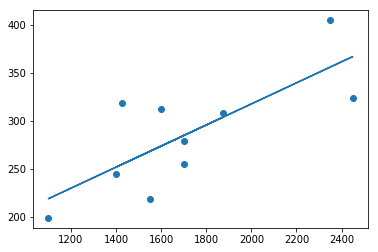

In [12]:
x5 = np.array([[1400.0], [1600.0], [1700.0], [1875.0], [1100.0], [1550.0], [2350.0], [2450.0], [1425.0], [1700.0]])
y5 = np.array([245.0, 312.0, 279.0, 308.0, 199.0, 219.0, 405.0, 324.0, 319.0, 255.0])
learning_rate = 0.00000001
initial_b0 = 0 # y-intercept inicial
initial_b1 = 0 # inclinação inicial
num_iterations = 10000000
run(x5, y5, initial_b0, initial_b1, learning_rate, num_iterations)
model = linear_model.LinearRegression()
model.fit(x5, y5)
b0, b1 = model.intercept_, model.coef_
y_pred = model.predict(x5)
print("_____________SKLEARN_________")
print("b0 = {}, b1 = {}, error = {}".format(b0, b1, compute_error_for_line_given_points(b0, b1, x5, y5)))
plt.scatter(x5,y5)
plt.plot(x5,y_pred)

In [13]:
distx = 100/0.0929 #Conversão em pés quadrados
yvalor = model.predict(distx)
print("VALOR DA PREDIÇÂO GRADIENTE DESCENDENTE: {}".format(0.29056662181300336 + 0.15842149071004888*distx))
print("VALOR DA PREDIÇÂO SKLEARN: ", yvalor)

VALOR DA PREDIÇÂO GRADIENTE DESCENDENTE: 170.81962013101526
VALOR DA PREDIÇÂO SKLEARN:  [ 216.40520565]
